In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignanat 212


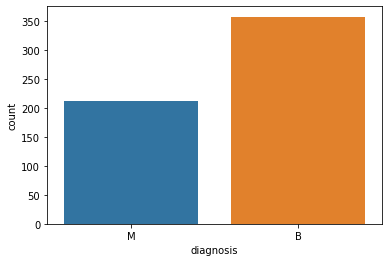

In [4]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)

In [5]:
# Importing data
del data['Unnamed: 32']

In [6]:
data.shape

(569, 32)

In [7]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [9]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [11]:
#adding the input and first hidden layer
classifier = Sequential()
#adding the 1st hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))
#adding the 2nd hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))
#adding the 3rd hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))
#adding the 4th hidden layer
classifier.add(Dense(1,activation='sigmoid'))

In [12]:
classifier.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
classifier.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 1.0095 - accuracy: 0.3626
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9282 - accuracy: 0.3626
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.8516 - accuracy: 0.3626
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7824 - accuracy: 0.3626
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7203 - accuracy: 0.3626
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.5385
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.9077
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7978
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.6637
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.6374
Epoch 11/

15/15 [==============================] - 0s 1ms/step - loss: 0.1862 - accuracy: 0.9868
Epoch 84/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9868
Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1775 - accuracy: 0.9868
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1734 - accuracy: 0.9868
Epoch 87/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1694 - accuracy: 0.9868
Epoch 88/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1655 - accuracy: 0.9868
Epoch 89/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1618 - accuracy: 0.9868
Epoch 90/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1582 - accuracy: 0.9868
Epoch 91/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1546 - accuracy: 0.9868
Epoch 92/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.9868
Epoch 93/100


In [14]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 1ms/step


In [16]:
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

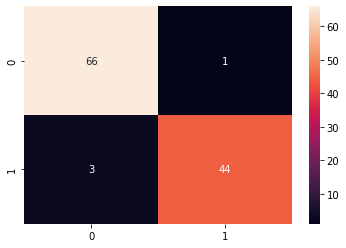

In [18]:
sns.heatmap(cm,annot=True)
#plt.savefig('h.png')


In [19]:
(66+44)/(66+44+3+1) #(tp+tn)/(tp+tn+fp+fn)

0.9649122807017544

## Cross Validation

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [21]:
def CV_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [22]:
classifier = KerasClassifier(build_fn = CV_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)

In [23]:
accuracies

array([0.97826087, 0.97826087, 0.89130437, 0.97826087, 0.63043481,
       0.95555556, 1.        , 0.60000002, 0.91111112, 0.62222224])

In [24]:
accuracies.mean()

0.8545410752296447

In [25]:
accuracies.std()

0.15837313663577046

# Parameter Optimization

In [26]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [27]:
def PO_classifier(optimizer = 'adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 30))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

In [28]:
classifier = KerasClassifier(build_fn = PO_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',cv = 10)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.6235
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6622 - accuracy: 0.6235
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.6235
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.6235
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5824 - accuracy: 0.6235
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.6235
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.6528
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.9340
Epoch 9/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.9584
Epoch 10/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.9756
Epoch 11/

41/41 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9902
Epoch 84/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 85/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.9902
Epoch 86/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9902
Epoch 87/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9902
Epoch 88/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9902
Epoch 89/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0535 - accuracy: 0.9902
Epoch 90/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0534 - accuracy: 0.9902
Epoch 91/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9902
Epoch 92/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9902
Epoch 93/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9902
Epoch 65/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9902
Epoch 66/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9902
Epoch 67/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9902
Epoch 68/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.9902
Epoch 69/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9902
Epoch 70/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.9902
Epoch 71/100
41/41 [==============================] - 0s 998us/step - loss: 0.0556 - accuracy: 0.9902
Epoch 72/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9902
Epoch 73/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9902
Epoch 74/10

41/41 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9902
Epoch 46/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9902
Epoch 47/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9902
Epoch 48/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0717 - accuracy: 0.9902
Epoch 49/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9902
Epoch 50/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9902
Epoch 51/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9902
Epoch 52/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9902
Epoch 53/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9902
Epoch 54/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0669 - accuracy: 0.9902
Epoch 55/100


41/41 [==============================] - 0s 1ms/step - loss: 0.1589 - accuracy: 0.9902
Epoch 27/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1506 - accuracy: 0.9902
Epoch 28/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9902
Epoch 29/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9902
Epoch 30/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.9902
Epoch 31/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9902
Epoch 32/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9902
Epoch 33/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.9902
Epoch 34/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.9902
Epoch 35/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9902
Epoch 36/100


2/2 [==============================] - 0s 2ms/step
Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6381
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.6381
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.6381
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.6381
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.6381
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.6381
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.6381
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.6381
Epoch 9/100
41/41 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.6381
Epoch 10/100
41/41 [==============================] - 0s 1

41/41 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9951
Epoch 83/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0353 - accuracy: 0.9951
Epoch 84/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0351 - accuracy: 0.9951
Epoch 85/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9951
Epoch 86/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0347 - accuracy: 0.9951
Epoch 87/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.9951
Epoch 88/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9951
Epoch 89/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0341 - accuracy: 0.9951
Epoch 90/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9951
Epoch 91/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.9951
Epoch 92/100


41/41 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9927
Epoch 57/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9927
Epoch 58/100
41/41 [==============================] - 0s 819us/step - loss: 0.0720 - accuracy: 0.9927
Epoch 59/100
41/41 [==============================] - 0s 752us/step - loss: 0.0708 - accuracy: 0.9927
Epoch 60/100
41/41 [==============================] - 0s 740us/step - loss: 0.0696 - accuracy: 0.9927
Epoch 61/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0684 - accuracy: 0.9927
Epoch 62/100
41/41 [==============================] - 0s 992us/step - loss: 0.0678 - accuracy: 0.9927
Epoch 63/100
41/41 [==============================] - 0s 875us/step - loss: 0.0666 - accuracy: 0.9927
Epoch 64/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9927
Epoch 65/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9927
Epo

41/41 [==============================] - 0s 994us/step - loss: 0.1573 - accuracy: 0.9878
Epoch 37/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1495 - accuracy: 0.9878
Epoch 38/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1423 - accuracy: 0.9878
Epoch 39/100
41/41 [==============================] - 0s 996us/step - loss: 0.1362 - accuracy: 0.9878
Epoch 40/100
41/41 [==============================] - 0s 859us/step - loss: 0.1301 - accuracy: 0.9878
Epoch 41/100
41/41 [==============================] - 0s 987us/step - loss: 0.1248 - accuracy: 0.9878
Epoch 42/100
41/41 [==============================] - 0s 999us/step - loss: 0.1198 - accuracy: 0.9878
Epoch 43/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9878
Epoch 44/100
41/41 [==============================] - 0s 794us/step - loss: 0.1112 - accuracy: 0.9878
Epoch 45/100
41/41 [==============================] - 0s 755us/step - loss: 0.1072 - accuracy: 0.9878

41/41 [==============================] - 0s 952us/step - loss: 0.2841 - accuracy: 0.9829
Epoch 17/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2635 - accuracy: 0.9805
Epoch 18/100
41/41 [==============================] - 0s 910us/step - loss: 0.2450 - accuracy: 0.9854
Epoch 19/100
41/41 [==============================] - 0s 974us/step - loss: 0.2281 - accuracy: 0.9878
Epoch 20/100
41/41 [==============================] - 0s 1ms/step - loss: 0.2131 - accuracy: 0.9878
Epoch 21/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1995 - accuracy: 0.9878
Epoch 22/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9878
Epoch 23/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9878
Epoch 24/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.9854
Epoch 25/100
41/41 [==============================] - 0s 872us/step - loss: 0.1576 - accuracy: 0.9878
Epoch

41/41 [==============================] - 0s 989us/step - loss: 0.0545 - accuracy: 0.9902
Epoch 98/100
41/41 [==============================] - 0s 906us/step - loss: 0.0546 - accuracy: 0.9902
Epoch 99/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 100/100
2/2 [==============================] - 0s 0s/step
Epoch 1/100
41/41 [==============================] - 1s 1ms/step - loss: 0.7638 - accuracy: 0.6439
Epoch 2/100
41/41 [==============================] - 0s 995us/step - loss: 0.6735 - accuracy: 0.6439
Epoch 3/100
41/41 [==============================] - 0s 853us/step - loss: 0.6190 - accuracy: 0.6439
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5954 - accuracy: 0.6439
Epoch 5/100
41/41 [==============================] - 0s 903us/step - loss: 0.5791 - accuracy: 0.6439
Epoch 6/100
41/41 [==============================] - 0s 842us/step - loss: 0.5654 - accuracy: 0.6439
Epoch 7/100
41/41 [========================

41/41 [==============================] - 0s 859us/step - loss: 0.0713 - accuracy: 0.9878
Epoch 78/100
41/41 [==============================] - 0s 994us/step - loss: 0.0710 - accuracy: 0.9878
Epoch 79/100
41/41 [==============================] - 0s 864us/step - loss: 0.0701 - accuracy: 0.9878
Epoch 80/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9878
Epoch 81/100
41/41 [==============================] - 0s 876us/step - loss: 0.0688 - accuracy: 0.9878
Epoch 82/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9878
Epoch 83/100
41/41 [==============================] - 0s 889us/step - loss: 0.0677 - accuracy: 0.9878
Epoch 84/100
41/41 [==============================] - 0s 852us/step - loss: 0.0672 - accuracy: 0.9878
Epoch 85/100
41/41 [==============================] - 0s 752us/step - loss: 0.0668 - accuracy: 0.9878
Epoch 86/100
41/41 [==============================] - 0s 848us/step - loss: 0.0666 - accuracy: 0.98

41/41 [==============================] - 0s 1ms/step - loss: 0.0791 - accuracy: 0.9902
Epoch 58/100
41/41 [==============================] - 0s 908us/step - loss: 0.0776 - accuracy: 0.9902
Epoch 59/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9902
Epoch 60/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9902
Epoch 61/100
41/41 [==============================] - 0s 969us/step - loss: 0.0735 - accuracy: 0.9902
Epoch 62/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9902
Epoch 63/100
41/41 [==============================] - 0s 959us/step - loss: 0.0711 - accuracy: 0.9902
Epoch 64/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9902
Epoch 65/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9902
Epoch 66/100
41/41 [==============================] - 0s 884us/step - loss: 0.0682 - accuracy: 0.9902
Epoch

41/41 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9902
Epoch 38/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0621 - accuracy: 0.9902
Epoch 39/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.9902
Epoch 40/100
41/41 [==============================] - 0s 948us/step - loss: 0.0607 - accuracy: 0.9902
Epoch 41/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0603 - accuracy: 0.9902
Epoch 42/100
41/41 [==============================] - 0s 870us/step - loss: 0.0597 - accuracy: 0.9902
Epoch 43/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9902
Epoch 44/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0588 - accuracy: 0.9902
Epoch 45/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0585 - accuracy: 0.9902
Epoch 46/100
41/41 [==============================] - 0s 975us/step - loss: 0.0582 - accuracy: 0.9902
Epoch 4

41/41 [==============================] - 0s 981us/step - loss: 0.1343 - accuracy: 0.9878
Epoch 19/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9878
Epoch 20/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.9878
Epoch 21/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9878
Epoch 22/100
41/41 [==============================] - 0s 865us/step - loss: 0.1132 - accuracy: 0.9878
Epoch 23/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9878
Epoch 24/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.9878
Epoch 25/100
41/41 [==============================] - 0s 950us/step - loss: 0.1029 - accuracy: 0.9878
Epoch 26/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.9878
Epoch 27/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.9878
Epoch 2

41/41 [==============================] - 0s 1ms/step - loss: 0.0544 - accuracy: 0.9902
Epoch 100/100
2/2 [==============================] - 0s 2ms/step
Epoch 1/100
41/41 [==============================] - 0s 1ms/step - loss: 0.7952 - accuracy: 0.3594
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5281
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6406
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.6406
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.6406
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.6406
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.6406
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.5594 - accuracy: 0.6406
Epoch 9/100
41/41 [==============================] - 0s 

41/41 [==============================] - 0s 923us/step - loss: 0.0606 - accuracy: 0.9902
Epoch 81/100
41/41 [==============================] - 0s 996us/step - loss: 0.0602 - accuracy: 0.9902
Epoch 82/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9902
Epoch 83/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9902
Epoch 84/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0591 - accuracy: 0.9902
Epoch 85/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.9902
Epoch 86/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0584 - accuracy: 0.9902
Epoch 87/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0582 - accuracy: 0.9902
Epoch 88/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9902
Epoch 89/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9902
Epoch 90/

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
best_parameters

In [ ]:
best_accuracy